# Desafío - Pruebas de hipótesis

**NOMBRE ALUMNO:** Jonathan Rodriguez

**FECHA:** 14-11-19

### Desafío 1: Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

* 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    * El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    * Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    * Con un valor de prueba `p = 0.1183` y un puntaje de corte de `z = 2.59`, ¿qué se debe concluir? 
    
* Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?.

**Caso Adopción homoparental:**

* Se tiene un puntaje de corte de Z = 2.59, que representa el valor en el eje x, el p-valor representa la probabilidad debajo de la curva. Revisando la información se puede determinar que 1-0.1183 = 0.8817 representa el valor a nivel visual es un Z = 1.23, que portanto como se encuentra dentro de nuestro Z. Podemos dar por enterado que no podemos rechazar la Hipótesis Nula 

**Caso Sociedad de Abstemios de Chile:**

* Sobre las características del estudio sobre 48 individuos, entre hombres y mujeres, pero se debieran recopilar un mínimo de 30 registros por subgrupo, 30 mujeres y 30 hombres al menos. No se puede asegurar que sea asintóticamente normal y por tanto se debe fallar en rechazar la hipótesis nula 

### Desafío 2: Importe la base de datos utilizada la sesión presencial anterior
* Agrege una serie de variables binarias por cada continente de la variable region.

*tip:* Utilice `np.where` o `pd.get_dummies` para ello.

* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    * Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
    * Apellidos desde la N hasta la Z: Enfocarse en las variables `femlab` , `literacy` y `school`.
    
    
La base de datos contiene información a nivel mundial sobre demografía:

* country : País.
* region : Continente del país.
* gdp : Producto Interno Bruto per cápita, precios 2005.
* school : Promedio años de escolaridad.
* adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
* life : Esperanza de vida al nacer.
* pop : Población total.
* urban : Porcentaje de población urbana.
* femlab : Tasa entre hombres y mujeres en el mercado laboral.
* literacy : Tasa de alfabetismo.
* co2 : Toneladas de Co2 mitidas per cápita.
* gini : Coeficiente de desigualdad del ingreso.

Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life.

Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Solucionando el problema de codificacion
df = pd.read_csv('nations.csv',  encoding = 'latin').drop(columns='Unnamed: 0')

df = pd.get_dummies(df, prefix = '', prefix_sep = '', columns=['region'])
df.columns = map(str.lower, df.columns)     

df.head()

,country,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,africa,americas,asia,europe,oceania
0,Algeria,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,Benin,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,Botswana,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,Burkina Faso,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,Burundi,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


### Desafío 3: Implemente una función de prueba de hipótesis a mano
* La función debe ingresar los siguientes argumentos:
    * `df` : La tabla de datos.
    * `variable` : La variable a analizar.
    * `binarize` : El indicador binario a utilizar.
* *tips:*
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
    * Implemente `ttest_ind` de `scipy.stats` y guarde el valor `t` y `pval`.
    * Reporte las medias para cada grupo (0 y 1).
    * Reporte la diferencia de entre las medias.
    * Reporte los valores `t` y `p`.
    
*Nota: Use 4 cifras significativas*

In [2]:
def prueba_hipotesis(df,variable,binarize,alpha=0.005,hist=False):
    """
    Función que genera una prueba de hipótesis

    Parameters:
    df (DataFrame): La función debe ingresar un objeto DataFrame
    variable (str): Variable a realizar a analizar
    binarize: El indicar binario a utilizar

    Returns:
    Retorna la impresión de las medias de cada grupo, la diferencia, el t y el p-valor

    """         
    tmp = df.copy()
    tmp['binarize'] = np.where(tmp[binarize] > np.mean(tmp[binarize]), 1, 0)
    value_zero = tmp[tmp['binarize'] == 0][variable].dropna()
    value_one = tmp[tmp['binarize'] == 1][variable].dropna()
    
    t, p_value = stats.ttest_ind(value_zero, value_one)
    mean_value_zero = round(value_zero.mean(),4)
    mean_value_one = round(value_one.mean(),4)
    mean_diff = mean_value_zero - mean_value_one
    plt.axvline(np.mean(value_zero), color = 'blue')
    plt.axvline(np.mean(value_one), color = 'orange')
    
    mean_diff = round(mean_diff,4)
    t = round(t,4)
    p_value = round(p_value,4)
    
    if (hist is True):
        plt.hist(value_zero, alpha=0.5, label='{} de países no {}'.format(variable,binarize))
        plt.hist(value_one, alpha=0.5, label='{} de países de {}'.format(variable,binarize))
        plt.legend(loc='upper right')
    
    print('Resultados del estudio')
    print('La media de {} excluyendo {} es: {} '.format(variable,binarize,mean_value_zero))
    print('La media de {} en {} es: {}'.format(variable,binarize,mean_value_one))
    print('Diferencia de medias: {} '.format(mean_diff))
    print('Valor de t: {} '.format(t))
    print('Valor de p: {} '.format(p_value))

    if p_value > alpha:
        print('No podemos rechazar la hipótesis nula con un alpha de {}'.format(alpha))
    else:
        print('Rechazamos la hipótesis nula con igualdad de medias con un alpha de {}'.format(alpha))
    print('\n')
    

### Desafío 4: Implemente una función que grafique los histogramas para ambas muestras.
* Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.
    * *tips:* Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.
* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

Resultados del estudio
La media de gdp excluyendo africa es: 15381.8551 
La media de gdp en africa es: 3699.9
Diferencia de medias: 11681.9551 
Valor de t: 5.415 
Valor de p: 0.0 
Rechazamos la hipótesis nula con igualdad de medias con un alpha de 0.005




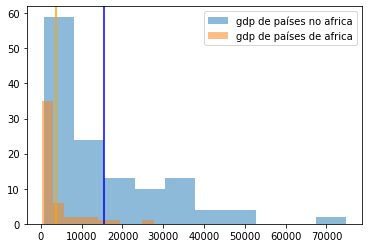

In [3]:
prueba_hipotesis(df, 'gdp', 'africa',0.005,True)

#### En este caso como su p-valor es cercano sea a cero, lo más probable es que los procesos tengan diferentes medias y se rechaza la hipótesis nula de igualdad de medias

Resultados del estudio
La media de femlab excluyendo africa es: 0.6761 
La media de femlab en africa es: 0.7299
Diferencia de medias: -0.0538 
Valor de t: -1.7839 
Valor de p: 0.0762 
No podemos rechazar la hipótesis nula con un alpha de 0.005


Resultados del estudio
La media de femlab excluyendo asia es: 0.7223 
La media de femlab en asia es: 0.6113
Diferencia de medias: 0.111 
Valor de t: 3.7455 
Valor de p: 0.0002 
Rechazamos la hipótesis nula con igualdad de medias con un alpha de 0.005


Resultados del estudio
La media de femlab excluyendo americas es: 0.7003 
La media de femlab en americas es: 0.6507
Diferencia de medias: 0.0496 
Valor de t: 1.3731 
Valor de p: 0.1715 
No podemos rechazar la hipótesis nula con un alpha de 0.005


Resultados del estudio
La media de femlab excluyendo europe es: 0.6705 
La media de femlab en europe es: 0.7716
Diferencia de medias: -0.1011 
Valor de t: -3.0635 
Valor de p: 0.0025 
Rechazamos la hipótesis nula con igualdad de medias con un alpha de 0

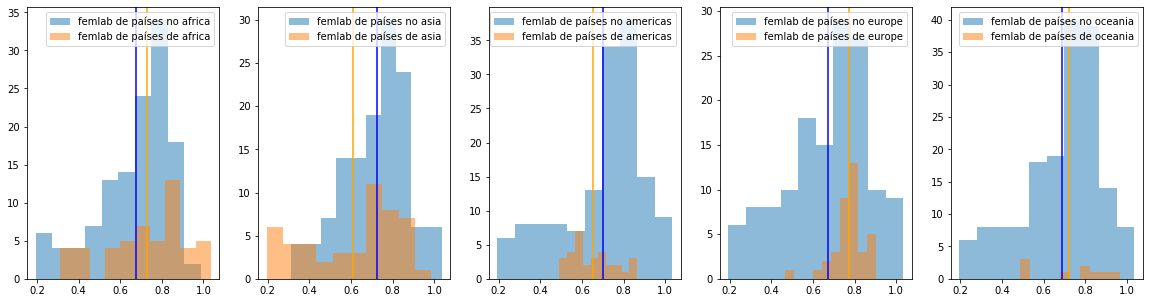

In [25]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1, 5, 1,autoscale_on = True)
prueba_hipotesis(df, 'femlab', 'africa',0.005,True)
plt.subplot(1, 5, 2,autoscale_on = True)
prueba_hipotesis(df, 'femlab', 'asia',0.005,True)
plt.subplot(1, 5, 3,autoscale_on = True)
prueba_hipotesis(df, 'femlab', 'americas',0.005,True)
plt.subplot(1, 5, 4,autoscale_on = True)
prueba_hipotesis(df, 'femlab', 'europe',0.005,True)
plt.subplot(1, 5, 5,autoscale_on = True)
prueba_hipotesis(df, 'femlab', 'oceania',0.005,True)

#### La mayor diferencia de medias en este estudio ocurre en las regiones de Europa y Asia, coincidiendo con el análisis realizado

Resultados del estudio
La media de literacy excluyendo africa es: 90.1986 
La media de literacy en africa es: 65.3085
Diferencia de medias: 24.8901 
Valor de t: 8.91 
Valor de p: 0.0 
Rechazamos la hipótesis nula con igualdad de medias con un alpha de 0.005


Resultados del estudio
La media de literacy excluyendo asia es: 78.9928 
La media de literacy en asia es: 87.3573
Diferencia de medias: -8.3645 
Valor de t: -2.3336 
Valor de p: 0.0211 
No podemos rechazar la hipótesis nula con un alpha de 0.005


Resultados del estudio
La media de literacy excluyendo americas es: 80.1822 
La media de literacy en americas es: 89.3012
Diferencia de medias: -9.119 
Valor de t: -1.9538 
Valor de p: 0.0528 
No podemos rechazar la hipótesis nula con un alpha de 0.005


Resultados del estudio
La media de literacy excluyendo europe es: 78.2927 
La media de literacy en europe es: 98.1773
Diferencia de medias: -19.8846 
Valor de t: -4.7184 
Valor de p: 0.0 
Rechazamos la hipótesis nula con igualdad de medi

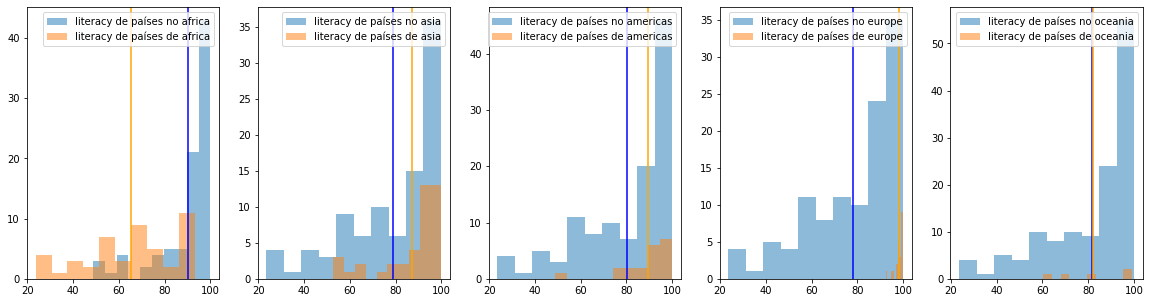

In [26]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1, 5, 1,autoscale_on = True)
prueba_hipotesis(df, 'literacy', 'africa',0.005,True)
plt.subplot(1, 5, 2,autoscale_on = True)
prueba_hipotesis(df, 'literacy', 'asia',0.005,True)
plt.subplot(1, 5, 3,autoscale_on = True)
prueba_hipotesis(df, 'literacy', 'americas',0.005,True)
plt.subplot(1, 5, 4,autoscale_on = True)
prueba_hipotesis(df, 'literacy', 'europe',0.005,True)
plt.subplot(1, 5, 5,autoscale_on = True)
prueba_hipotesis(df, 'literacy', 'oceania',0.005,True)

#### La mayor diferencia de medias en este estudio ocurre en las regiones de Europa y África, coincidiendo con el análisis realizado

Resultados del estudio
La media de school excluyendo africa es: 8.5523 
La media de school en africa es: 4.5229
Diferencia de medias: 4.0294 
Valor de t: 10.4158 
Valor de p: 0.0 
Rechazamos la hipótesis nula con igualdad de medias con un alpha de 0.005


Resultados del estudio
La media de school excluyendo asia es: 7.5271 
La media de school en asia es: 7.2611
Diferencia de medias: 0.266 
Valor de t: 0.5364 
Valor de p: 0.5923 
No podemos rechazar la hipótesis nula con un alpha de 0.005


Resultados del estudio
La media de school excluyendo americas es: 7.3188 
La media de school en americas es: 8.0729
Diferencia de medias: -0.7541 
Valor de t: -1.3628 
Valor de p: 0.1746 
No podemos rechazar la hipótesis nula con un alpha de 0.005


Resultados del estudio
La media de school excluyendo europe es: 6.633 
La media de school en europe es: 10.4215
Diferencia de medias: -3.7885 
Valor de t: -8.5243 
Valor de p: 0.0 
Rechazamos la hipótesis nula con igualdad de medias con un alpha de 0.005


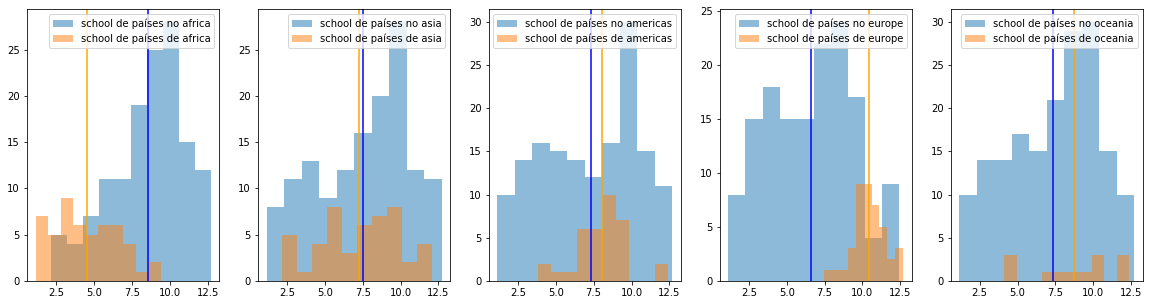

In [27]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1, 5, 1,autoscale_on = True)
prueba_hipotesis(df, 'school', 'africa',0.005,True)
plt.subplot(1, 5, 2,autoscale_on = True)
prueba_hipotesis(df, 'school', 'asia',0.005,True)
plt.subplot(1, 5, 3,autoscale_on = True)
prueba_hipotesis(df, 'school', 'americas',0.005,True)
plt.subplot(1, 5, 4,autoscale_on = True)
prueba_hipotesis(df, 'school', 'europe',0.005,True)
plt.subplot(1, 5, 5,autoscale_on = True)
prueba_hipotesis(df, 'school', 'oceania',0.005,True)

#### La mayor diferencia de medias en este estudio ocurre en las regiones de Europa y África, coincidiendo con el análisis realizado